# APPLIED DATA SCIENCE ASSIGNMENT 2

### B.Yeshwanth
### 20BCE1730

## 1)Download the dataset and import the libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2)Load Dataset

In [4]:
data=pd.read_csv('titanic.csv')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 3)Perform Below Visualizations.
##### Univariate Analysis
#### Bi - Variate Analysis
#### Multi - Variate Analysis

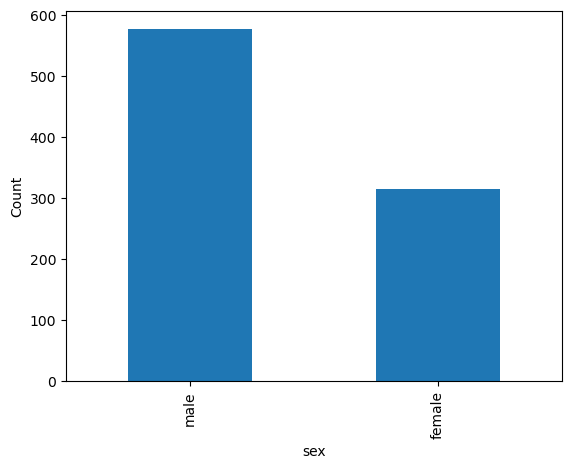

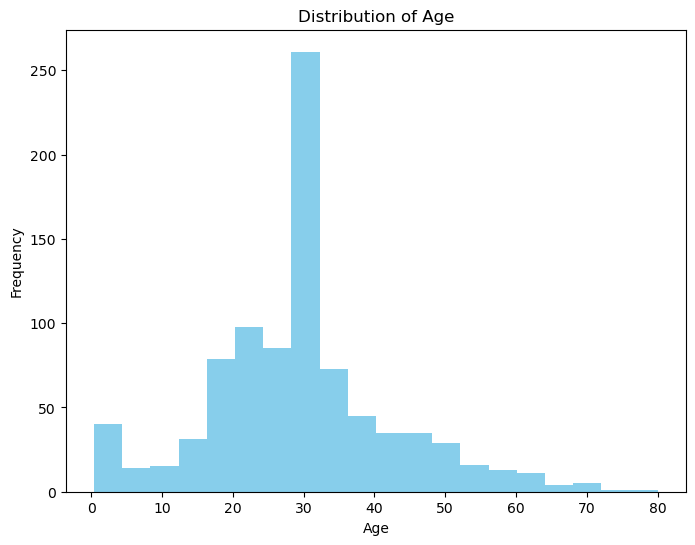

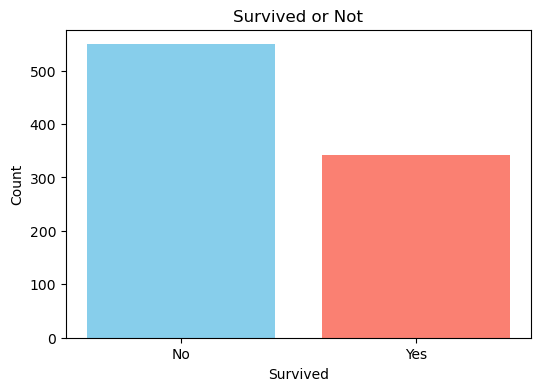

In [28]:
#Univariate Analysis
sex_count= data['sex'].value_counts()
sex_count.plot(kind='bar')
plt.xlabel('sex')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(data['age'].dropna(), bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

survived_counts = data['survived'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(survived_counts.index, survived_counts.values, color=['skyblue', 'salmon'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survived or Not')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()




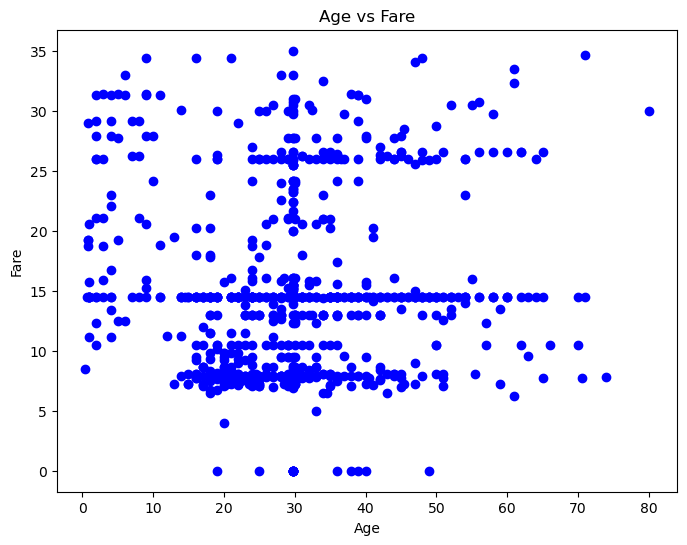

In [29]:
#Bi-variarte Analysis
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['fare'], color='blue')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()

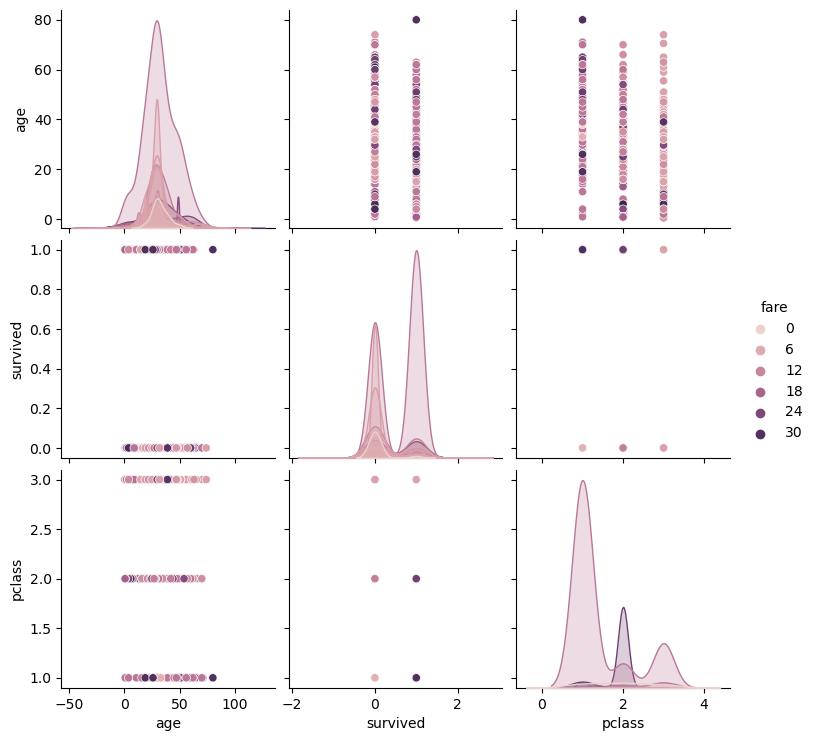

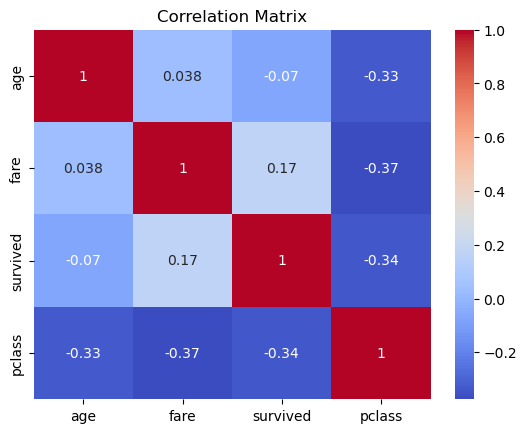

In [33]:
#Multi-variate Analysis
sns.pairplot(data[['age', 'fare', 'survived', 'pclass']], hue='fare')
plt.show()

correlation_matrix = data[['age', 'fare', 'survived', 'pclass']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##  4)Perform descriptive statistics on the dataset

In [8]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data['age'].median()

28.0

In [10]:
data['fare'].mode()

0    8.05
Name: fare, dtype: float64

## 5)Handle the Missing values

In [11]:
data['age'].fillna(data['age'].mean(), inplace=True)
data['deck'].fillna('Unknown', inplace=True)
print(data)

     survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male     deck  embark_town alive  alone  
0     Third    man 

## 6)Find the outliers and replace the outliers

In [80]:
Q1 = data['fare'].quantile(0.25)
Q3 = data['fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = (data['fare'] < (Q1 - 1.5 * IQR)) | (data['fare'] > (Q3 + 1.5 * IQR))
data[outliers] = np.nan
means = data.mean()
data = data.fillna(means)
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
outliers = (data['age'] < (Q1 - 1.5 * IQR)) | (data['age'] > (Q3 + 1.5 * IQR))
data[outliers] = np.nan
means = data.mean()
data = data.fillna(means)
data

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,deck_D,deck_E,deck_F,deck_G,deck_Unknown,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,0.000000,0.827377,-5.924806e-01,0.432793,-0.473674,-0.948329,True,False,0.00,1.00,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
1,1.000000,-1.566107,6.387890e-01,0.432793,-0.473674,0.034660,False,False,1.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
2,1.000000,0.827377,-2.846632e-01,-0.474545,-0.473674,-0.856227,False,True,1.00,0.00,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
3,1.000000,-1.566107,4.079260e-01,0.432793,-0.473674,0.034660,False,False,1.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
4,0.000000,0.827377,4.079260e-01,-0.474545,-0.473674,-0.839171,True,True,0.00,1.00,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.000000,-0.369365,-2.077088e-01,-0.474545,-0.473674,-0.163761,True,True,0.00,1.00,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
887,0.386585,0.037819,8.494568e-03,-0.050752,-0.081603,-0.190149,0.613415,0.618293,0.35,0.65,...,0.035366,0.039024,0.015854,0.004878,0.780488,0.181707,0.087805,0.728049,0.613415,0.386585
888,0.000000,0.827377,-3.399518e-16,0.432793,2.008933,1.262105,False,False,1.00,0.00,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
889,0.386585,0.037819,8.494568e-03,-0.050752,-0.081603,-0.190149,0.613415,0.618293,0.35,0.65,...,0.035366,0.039024,0.015854,0.004878,0.780488,0.181707,0.087805,0.728049,0.613415,0.386585


## 7)Check for Categorical columns and perform encoding

In [82]:
categorical_columns = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)
data_encoded

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,...,adult_male_False,adult_male_0.6134146341463415,adult_male_0.6156809189157273,adult_male_0.6449753352478601,adult_male_True,alone_False,alone_0.6182926829268293,alone_0.6282067560385052,alone_0.6734935574532444,alone_True
0,0.000000,0.827377,-5.924806e-01,0.432793,-0.473674,-0.948329,0.00,1.00,0.000000,0.000000,...,0,0,0,0,1,1,0,0,0,0
1,1.000000,-1.566107,6.387890e-01,0.432793,-0.473674,0.034660,1.00,0.00,1.000000,0.000000,...,1,0,0,0,0,1,0,0,0,0
2,1.000000,0.827377,-2.846632e-01,-0.474545,-0.473674,-0.856227,1.00,0.00,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,1
3,1.000000,-1.566107,4.079260e-01,0.432793,-0.473674,0.034660,1.00,0.00,0.000000,0.000000,...,1,0,0,0,0,1,0,0,0,0
4,0.000000,0.827377,4.079260e-01,-0.474545,-0.473674,-0.839171,0.00,1.00,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.000000,-0.369365,-2.077088e-01,-0.474545,-0.473674,-0.163761,0.00,1.00,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,1
887,0.386585,0.037819,8.494568e-03,-0.050752,-0.081603,-0.190149,0.35,0.65,0.181707,0.087805,...,0,1,0,0,0,0,1,0,0,0
888,0.000000,0.827377,-3.399518e-16,0.432793,2.008933,1.262105,1.00,0.00,0.000000,0.000000,...,1,0,0,0,0,1,0,0,0,0
889,0.386585,0.037819,8.494568e-03,-0.050752,-0.081603,-0.190149,0.35,0.65,0.181707,0.087805,...,0,1,0,0,0,0,1,0,0,0


## 8)Split the data into dependent and independent variables

In [38]:
from sklearn.model_selection import train_test_split
x = data.drop(columns = ['survived'], axis = 1)
y = data['survived']
y.head()


0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [39]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False
1,1,female,38.0,1,0,14.4542,C,First,woman,False,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True
3,1,female,35.0,1,0,14.4542,S,First,woman,False,C,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True


## 9) Scale the independent variables

In [83]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
independent_vars = ['pclass', 'age', 'sibsp', 'parch', 'fare']
minmax_scaler = MinMaxScaler()
data[independent_vars] = minmax_scaler.fit_transform(data[independent_vars])
standard_scaler = StandardScaler()
data[independent_vars] = standard_scaler.fit_transform(data[independent_vars])
print(data)


     survived    pclass       age     sibsp     parch      fare adult_male  \
0    0.000000  0.844911 -1.131336  0.663478 -0.486313 -1.118672       True   
1    1.000000 -2.264404  1.981338  0.663478 -0.486313  0.809131      False   
2    1.000000  0.844911 -0.353168 -0.482034 -0.486313 -0.938045      False   
3    1.000000 -2.264404  1.397712  0.663478 -0.486313  0.809131      False   
4    0.000000  0.844911  1.397712 -0.482034 -0.486313 -0.904596       True   
..        ...       ...       ...       ...       ...       ...        ...   
886  0.000000 -0.709747 -0.158625 -0.482034 -0.486313  0.419995       True   
887  0.386585 -0.180784  0.387941  0.053004  0.127496  0.368245   0.613415   
888  0.000000  0.844911  0.366467  0.663478  3.400354  3.216355      False   
889  0.386585 -0.180784  0.387941  0.053004  0.127496  0.368245   0.613415   
890  0.000000  0.844911  0.814085 -0.482034 -0.486313 -0.984874       True   

        alone  sex_female  sex_male  ...    deck_D    deck_E   

## 10)Split the data into training and testing

In [43]:
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [44]:
x_train.size

9968

In [45]:
x_test.size

2506

In [46]:
x_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
140,3,female,29.699118,0,2,15.2458,C,Third,woman,False,Unknown,Cherbourg,no,False
439,2,male,31.000000,0,0,10.5000,S,Second,man,True,Unknown,Southampton,no,True
817,2,male,31.000000,1,1,14.4542,C,Second,man,True,Unknown,Cherbourg,no,False
378,3,male,20.000000,0,0,4.0125,C,Third,man,True,Unknown,Cherbourg,no,True
491,3,male,21.000000,0,0,7.2500,S,Third,man,True,Unknown,Southampton,no,True


In [47]:
y_test.head()

495    0
648    0
278    0
31     1
255    1
Name: survived, dtype: int64